   target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y   z      {  
0  62.306825  145.0 -1.007833  0.0  61.730527 NaN  

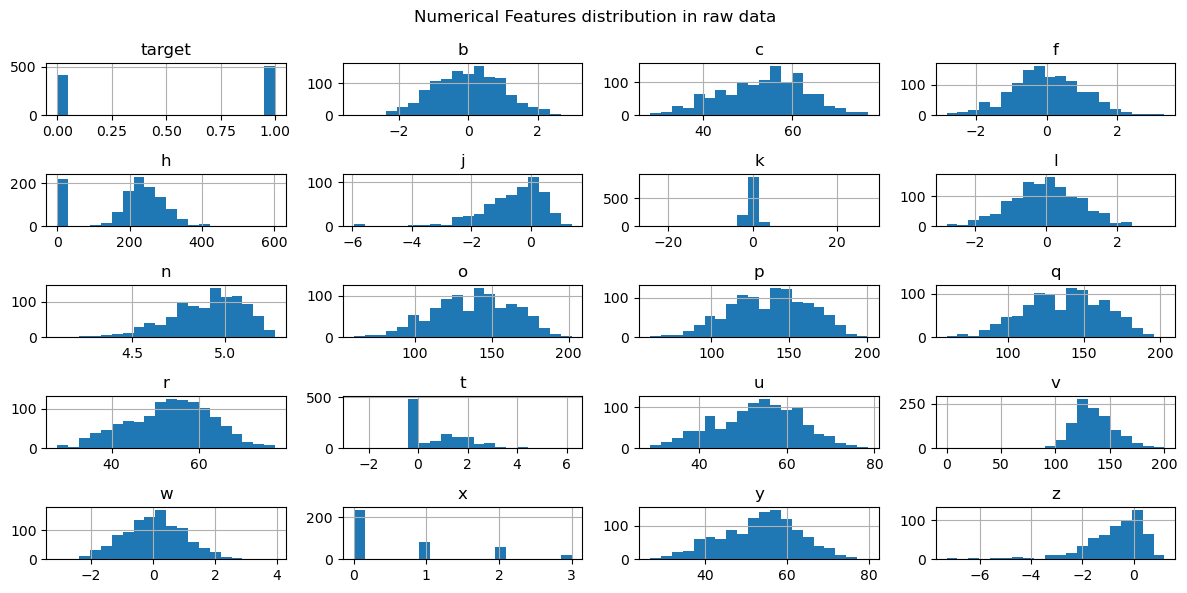

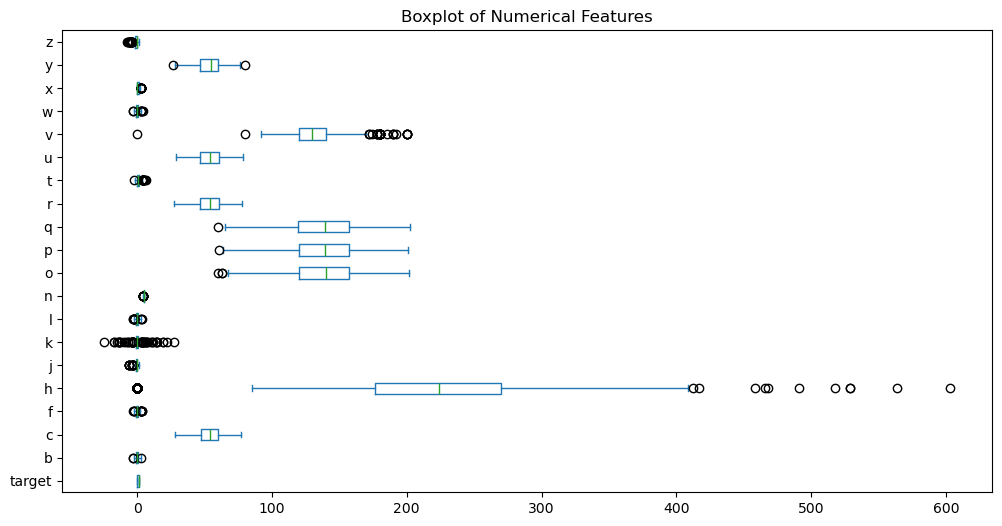

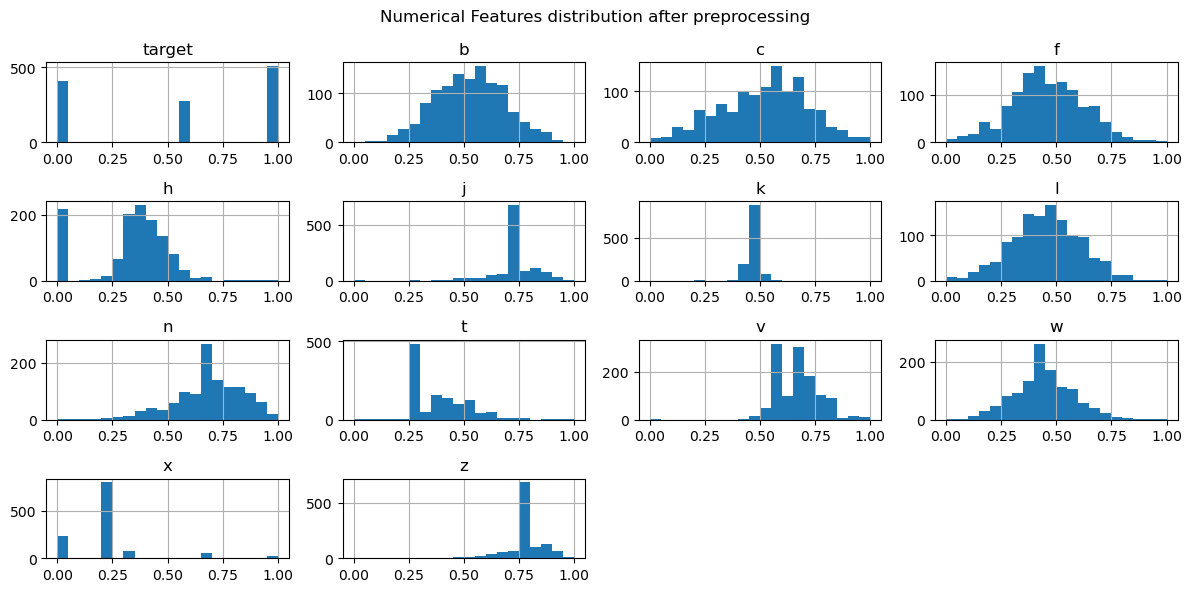

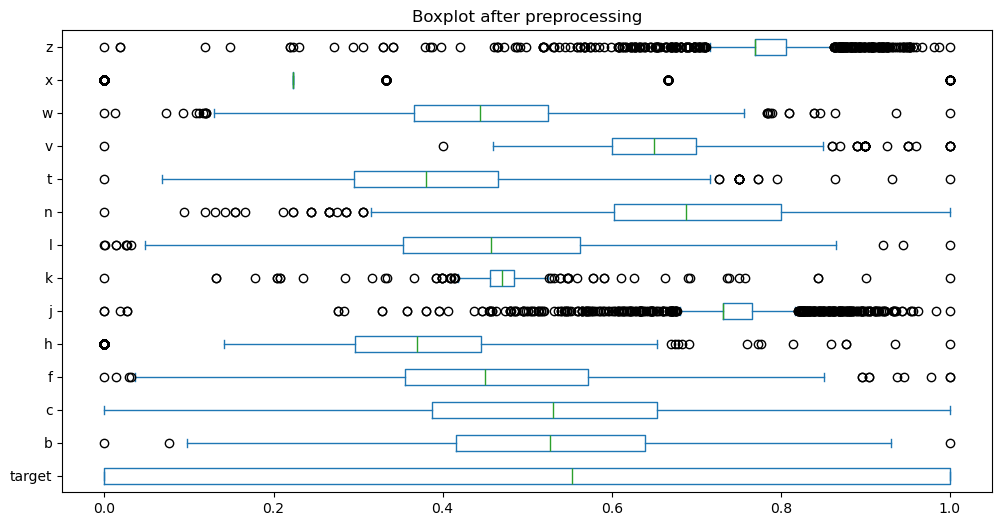

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        56
           1       0.71      0.68      0.69        40

    accuracy                           0.75        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.75      0.75      0.75        96

Final rows: 480
Final columns: 22
Total missing cells target    0
a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
s         0
t         0
v         0
w         0
x         0
z         0
{         0
dtype: int64
Duplicate Rows: 41
            target       a           b           c       d          e  \
count   480.000000     480  480.000000  480.000000     480        480   
unique         NaN       3         NaN         NaN       3          4   
top            NaN  normal         NaN         NaN  normal  Clevel

In [28]:

# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


messy_data = pd.read_csv('../Data/messy_data.csv')
print(messy_data.head())
print("Total missing cells", messy_data.isnull().sum())
print(messy_data.describe(include='all'))
print(messy_data.info())
print("Duplicate Rows:", messy_data.duplicated().sum())

# At the start (after loading data):
print("Initial rows:", len(messy_data))
print("Initial columns:", len(messy_data.columns))  

# Initial Data Visualization 
numerical_cols = messy_data.select_dtypes(include=['int64','float64']).columns
messy_data[numerical_cols].hist(bins=20, figsize=(12,6))
plt.suptitle('Numerical Features distribution in raw data')
plt.tight_layout()
plt.show()

messy_data[numerical_cols].plot(kind='box', vert=False, figsize=(12,6))
plt.title('Boxplot of Numerical Features')
plt.show()

clean_data = messy_data.copy() 

# 2. Preprocess the data
clean_data = impute_missing_values(clean_data, strategy='mean')
clean_data = remove_duplicates(clean_data)
clean_data = normalize_data(clean_data)
clean_data = remove_redundant_features(clean_data)   

clean_data = clean_data.drop_duplicates()

# Post-cleaning visualization
current_numerical_cols = clean_data.select_dtypes(include=['int64','float64']).columns
clean_data[current_numerical_cols].hist(bins=20, figsize=(12,6))
plt.suptitle('Numerical Features distribution after preprocessing')
plt.tight_layout()
plt.show()

clean_data[current_numerical_cols].plot(kind='box', vert=False, figsize=(12,6))
plt.title('Boxplot after preprocessing')
plt.show()

# Save and model
clean_data.to_csv('../Data/clean_data.csv', index=False)
clean_data[clean_data.columns[0]] = (clean_data.iloc[:, 0] > clean_data.iloc[:, 0].median()).astype(int)

simple_model(clean_data, split_data=True, scale_data=False, print_report=True)

# Final stats
print("Final rows:", len(clean_data))
print("Final columns:", len(clean_data.columns))
print("Total missing cells", clean_data.isnull().sum())
print("Duplicate Rows:", clean_data.duplicated().sum())
print(clean_data.describe(include='all'))
print("Redundant features removed:", len(clean_data.columns) - len(current_numerical_cols))